Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [1]:
NAME = "Maciej Wilhelmi"

---

# 0. Zbiór danych

W ramach obecnego laboratorium będziemy badać metody wielomodalnego uczenia reprezentacji. W tym celu wykorzystamy zbiór danych `Memotion Dataset 7k`. Zbiór składa się z około 7,000 memów, a każdy z nich jest oceniony pod względem: humorystyki (`humour`), sarkazmu (`sarcasm`), ofensywności (`offensive`), czy jest motywacyjny (`motivational`) oraz ogólnego wydźwięku (`sentiment`). W celu przyspieszenia uczenia modeli rozważanych w trakcie tego laboratorium wybierzemy mniejszy podzbiór memów.


## 0.0. Pobranie i przygotowanie zbioru
a) Wykorzystując [link do Kaggle](https://www.kaggle.com/williamscott701/memotion-dataset-7k), należy pobrać zbiór danych i rozpakować go do katalogu `data/memotion/` (tak aby w tym katalogu znajdowały się: katalog `images/` oraz plik `labels.csv`)

b) Po przygotowaniu środowiska Pythonowego, należy wygenerować zbiór danych uruchamiając komendę:
```bash
$ python3 scripts/prepare_memotion.py
```
Skrypt ten wczyta oznaczenia danych (`labels.csv`) i dla każdego mema:
- wczyta obrazek i zamieni go na format, który będzie łatwy do użycia w celach wizualizacyjnych
- uruchomi model osadzania obrazków na każdym z nich (tutaj: **ResNet50**)
- uruchomi model osadzania tekstu na każdy podpisie mema (tutaj: **all-MiniLM-L6-v2** z biblioteki `sentence-transformers`)

Następnie przekształcone powyższe atrybuty zostaną zapisane w pliku `data/processed.pkl`

In [2]:
# uncomment and run command below if you prefer to run the script from this notebook
!python3 scripts/prepare_memotion.py

/Users/cusiowaty24/opt/anaconda3/envs/pmg2/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/cusiowaty24/opt/anaconda3/envs/pmg2/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/cusiowaty24/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████████████████████████████████| 97.8M/97.8M [00:32<00:00, 3.18MB/s]
Processing:   0%|                                      | 0/1000 [00:00<?, ?it/s]/Users/c

In [3]:
import pandas as pd
import torch

In [4]:
df = pd.read_pickle("data/processed.pkl")

df.shape

(1000, 9)

In [7]:
from sklearn.decomposition import PCA

from src.visualization import make_interactive_scatter_plot

img_emb = torch.stack(df["img_emb"].values.tolist())

make_interactive_scatter_plot(
    title="Raw image embeddings",
    z_2d=PCA(n_components=2).fit_transform(img_emb),
    df=df,
)

Dash is running on http://127.0.0.1:8050/



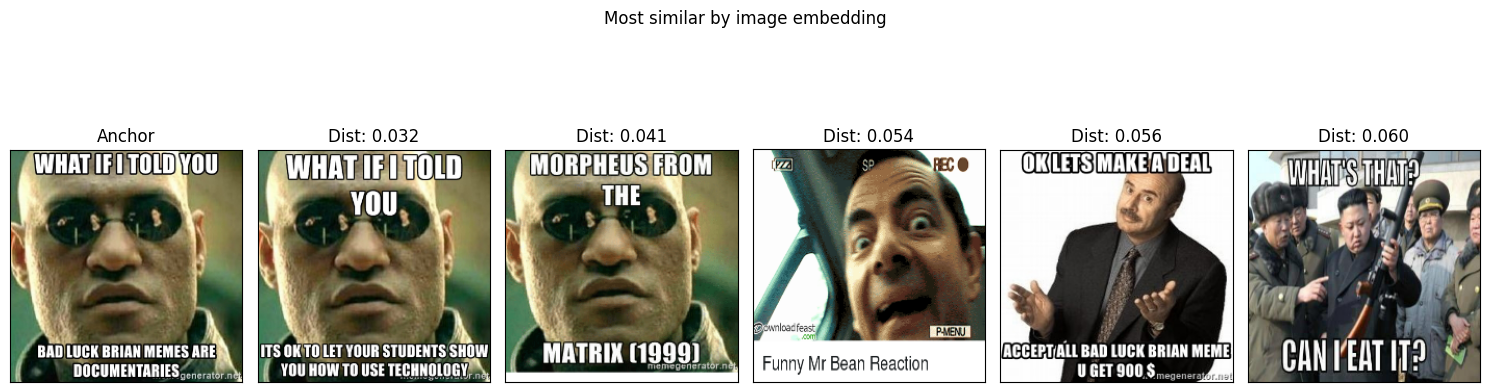

In [8]:
from src.visualization import visualize_most_similar


_ = visualize_most_similar(
    title="Most similar by image embedding",
    anchor_index=339,
    z=img_emb,
    df=df,
)

In [9]:
text_emb = torch.stack(df["text_emb"].values.tolist())

make_interactive_scatter_plot(
    title="Raw text embeddings",
    z_2d=PCA(n_components=2).fit_transform(text_emb),
    df=df,
)

Dash is running on http://127.0.0.1:8050/



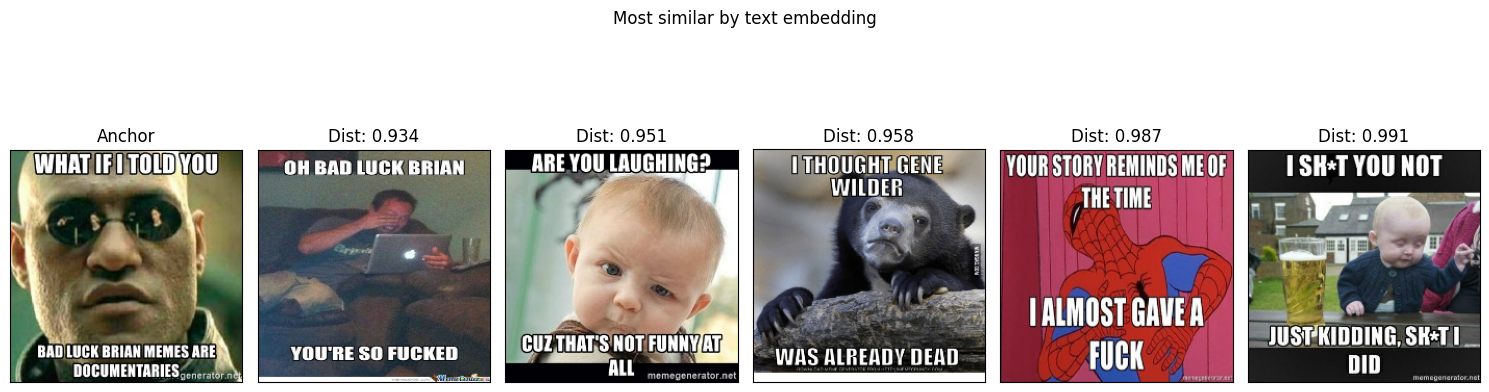

In [11]:
_ = visualize_most_similar(
    title="Most similar by text embedding",
    anchor_index=339,
    z=text_emb,
    df=df,
)